# Data Visualization
As part of this module I will quickly walk through some of the capabilities of Matplotlib library to visualize our data.

* Getting Started
* Attributes of a Graph
* Overview of LinkedIn Data
* Prepare LinkedIn Data (Contacts)
* Plot Contact Count by Source
* Plot using loops
* Bar Graph
* Histogram
* Stack Plot

## Getting Started
Let us get started with our first graph using Matplotlib.
* We can validate whether `matplotlib` exists or not. If it does not exists we can install using `python -m pip install matplotlib`.
* We need to import `pyplot` from `matplotlib`

In [ ]:
from matplotlib import pyplot as plt

* We can invoke pyplot's `plot` function to create line graph by passing values for x axis and y axis in the same order.

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

* `pyplot` have function to define labels for x axis and y axis (`xlabel` and `ylabel`)

In [ ]:
plt.xlabel('x')
plt.ylabel('x square')

* We can apply all the required attributes and then invoke `show` to get more intuitive graph.

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.xlabel('x')
plt.ylabel('x square')
plt.show()

## Attributes of a graph

Here are some of the attributes of a graph.
* x-axis and y-axis
* Data in x-axis and y-axis
* Labels for x-axis and y-axis
* At times we might want to display multiple line graphs, in which case we can create legends to define the purpose of each line graph. 

In [ ]:
from matplotlib import pyplot as plt
x1 = [1, 2, 3, 4]
y1 = [2, 4, 6, 8]
x2 = [1, 2, 3, 4]
y2 = [3, 6, 9, 12]

plt.plot(x1, y1)
plt.plot(x2, y2)

plt.xlabel('x')
plt.ylabel('x-multiple')

plt.show()

In [ ]:
from matplotlib import pyplot as plt
x1 = [1, 2, 3, 4]
y1 = [2, 4, 6, 8]
x2 = [1, 2, 3, 4]
y2 = [3, 6, 9, 12]

plt.plot(x1, y1, label='x-double')
plt.plot(x2, y2, label='x-triple')

plt.xlabel('x')
plt.ylabel('x-multiple')

plt.legend()

plt.show()

## Overview of LinkedIn Data
Let me explain you about the LinkedIn Data that is being used as part of the demo.
* LinkedIn provides data archive on request.
* It contains all the data related to us.
* Contacts contain all the contacts which LinkedIn got from our mail boxes.
* Connections reflect data from our connections. 
* I have downloaded my data archive and masked names and email ids for this demo.
* We will be using plots, histograms, bar charts etc to visualize using LinkedIn data.

## Prepare LinkedIn Data (Contacts)

Let us prepare LinkedIn Data to visualize using Matplot lib.
* Read data from the files using Pandas.
* We want to plot using number of contacts from each source.
* Logic can be built using Pandas APIs.

In [ ]:
base_dir = '/Users/itversity/Research/data/linkedin'
source_file = '{base_dir}/{file_name}'

In [ ]:
import pandas as pd

contacts_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Contacts.csv'
)

contacts = pd.read_csv(contacts_src).astype(str)
contacts

In [ ]:
contacts_count_by_source = contacts. \
    groupby(contacts['Source'])['Source']. \
    count()

## Plot Contact Count by Source
Let us understand how we can plot using data from Data Frame.
* Take the data from contacts_count_by_source.
* It is of type Series. Series will have index and values.
* In our case index is nothing but contact source and values is nothing but count for each source.

In [ ]:
type(contacts_count_by_source)

In [ ]:
contacts_count_by_source.index.tolist()

In [ ]:
contacts_count_by_source.values.tolist()

* Let us plot contact source on x-axis and count on y-axis.
* Let us also define labes for x and y axes.

In [ ]:
plt.plot(contacts_count_by_source.index.tolist(), 
         contacts_count_by_source.values.tolist()
        )
plt.xlabel('Contact Source')
plt.ylabel('Count')
plt.show()

* Contact Source is not rendered properly due to lack of space.
* We can improvise by rotating the contact source names using `xticks` for values on x-axis.

In [ ]:
plt.plot(contacts_count_by_source.index.tolist(), 
         contacts_count_by_source.values.tolist()
        )
plt.xlabel('Contact Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Prepare LinkedIn Data (Connections)

We will use Connections data for multiline chart.
* Read Connections data.
* Here is the problem statement.
  * Let us plot all the months from 2017 January to 2018 December on x-axis.
  * Let us plot the monthly connection count for top 2 companies.
* We need to ensure that the months are sorted properly.
* We need to get connection count per organization and sort data by count in descending order to see top organizations.
* We also need to get the monthly count for each of the selected organizations
* Reading Connection data

In [15]:
base_dir = '/Users/itversity/Research/data/linkedin'
source_file = '{base_dir}/{file_name}'

In [16]:
import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)

* Filtering for 2017 and 2018 data.

In [17]:
connections = connections. \
    query('`Connected On`.str.contains("2017") or `Connected On`.str.contains("2018")', engine='python')
connections

,First Name,Last Name,Email Address,Company,Position,Connected On
2432,dcdbd5ee9cc84b07,c836f47cefaed87a,nan,Virtusa,Senior Consultant,31 Dec 2018
2433,1b48dd706a05529d,9f020a84886ab17e,nan,Bayer,Data Analytics Lead,31 Dec 2018
2434,81bd075bec50b585,13750ce1b05934ad,nan,Confidential,Program/Engagement Director - Innovation & En...,31 Dec 2018
2435,15be3b238e4156c2,d12a54842ad66bc6,nan,Concirrus,Team Lead (Quest Marine Hull) and Sr. Data Ana...,31 Dec 2018
2436,b8c9f0200a5342eb,20c7831ec03d8c85,nan,"Oalva, Inc.",Hadoop Administrator,31 Dec 2018
...,...,...,...,...,...,...
18723,aa5af8e173cfcf24,1a315620878e5af6,nan,Atos Syntel,Consultant,01 Jan 2017
18724,cb590ecf8a932956,febf7a7e2f605907,nan,Ernst & Young,Big Data-Data Science Evangelist/Sr.Analytics ...,01 Jan 2017
18725,f798f3280ccb2d6e,56053813ae694d4d,nan,nan,nan,01 Jan 2017
18726,aa7133e6205fb23f,8121a6fe0f0a8d9e,nan,Hewlett Packard Enterprise,Associate Hadoop Developer,01 Jan 2017


* Getting count by organization

In [18]:
connection_count_by_company = connections.groupby('Company')['Company'].count()
connection_count_by_company

Company
     www.ibridz.com    1
 -                     2
 - BSM Group -         1
 --------              1
 -----------           1
                      ..
上海证券公司                 1
新奥集团                   1
日立咨询                   1
泽方企业管理咨询有限公司           1
甲骨文                    1
Name: Company, Length: 8584, dtype: int64

In [19]:
type(connection_count_by_company)

pandas.core.series.Series

In [20]:
connection_count_by_company[connection_count_by_company.ge(50) == True]

Company
Accenture                     166
Amazon                         53
Capgemini                     149
Citi                           55
Cognizant                     299
Confidential                   74
DXC Technology                 58
Deloitte                       55
EY                             52
HCL Technologies              104
IBM                           127
Infosys                       184
JPMorgan Chase & Co.           53
Microsoft                      52
Oracle                         65
Tata Consultancy Services     351
Tech Mahindra                  86
Wipro Limited                  68
nan                          1084
Name: Company, dtype: int64

In [21]:
connection_count_by_company.sort_values(ascending=False)

Company
nan                          1084
Tata Consultancy Services     351
Cognizant                     299
Infosys                       184
Accenture                     166
                             ... 
Peterbilt Motors Company        1
Petrikore Marketing             1
PharmaACE                       1
Pharmaceutical MNC              1
     www.ibridz.com             1
Name: Company, Length: 8584, dtype: int64

* Filter for Cognizant and count by month

In [22]:
connections[connections['Company'] == 'Cognizant']

,First Name,Last Name,Email Address,Company,Position,Connected On
2652,9b681fa78fa3dc37,3b55eacd33c74667,nan,Cognizant,Project Associate,17 Dec 2018
2668,df3e9a753762f58b,88f043c3a7ca8b4f,nan,Cognizant,Programmer,15 Dec 2018
2674,d552a86183653ec5,8b88f724365cb18a,nan,Cognizant,Associate,15 Dec 2018
2818,a62716ed9a820f06,a3b4c1e1ee716a6b,nan,Cognizant,Lead Architect,25 Nov 2018
2826,c21745b409f4c19c,ffe08227ab51600d,nan,Cognizant,Associate,25 Nov 2018
...,...,...,...,...,...,...
18438,4f3ed804ee2279b1,d31afc7985cd143e,nan,Cognizant,Senior Associate,17 Jan 2017
18621,4ab6d956a7031b71,d52b0919012e8d79,nan,Cognizant,Big Data Consultant,11 Jan 2017
18684,1105430bf40f2e0d,1ac2e86acd81b55a,nan,Cognizant,Senior Associate,05 Jan 2017
18690,b8d796caf86a8135,3df229f0da8d180a,nan,Cognizant,Big Data Architect,04 Jan 2017


In [23]:
import datetime
connections['Connected Month'] = connections['Connected On']. \
    apply(lambda d: datetime.datetime.strptime(d, '%d %b %Y').strftime('%Y-%m'))

In [24]:
connections

,First Name,Last Name,Email Address,Company,Position,Connected On,Connected Month
2432,dcdbd5ee9cc84b07,c836f47cefaed87a,nan,Virtusa,Senior Consultant,31 Dec 2018,2018-12
2433,1b48dd706a05529d,9f020a84886ab17e,nan,Bayer,Data Analytics Lead,31 Dec 2018,2018-12
2434,81bd075bec50b585,13750ce1b05934ad,nan,Confidential,Program/Engagement Director - Innovation & En...,31 Dec 2018,2018-12
2435,15be3b238e4156c2,d12a54842ad66bc6,nan,Concirrus,Team Lead (Quest Marine Hull) and Sr. Data Ana...,31 Dec 2018,2018-12
2436,b8c9f0200a5342eb,20c7831ec03d8c85,nan,"Oalva, Inc.",Hadoop Administrator,31 Dec 2018,2018-12
...,...,...,...,...,...,...,...
18723,aa5af8e173cfcf24,1a315620878e5af6,nan,Atos Syntel,Consultant,01 Jan 2017,2017-01
18724,cb590ecf8a932956,febf7a7e2f605907,nan,Ernst & Young,Big Data-Data Science Evangelist/Sr.Analytics ...,01 Jan 2017,2017-01
18725,f798f3280ccb2d6e,56053813ae694d4d,nan,nan,nan,01 Jan 2017,2017-01
18726,aa7133e6205fb23f,8121a6fe0f0a8d9e,nan,Hewlett Packard Enterprise,Associate Hadoop Developer,01 Jan 2017,2017-01


In [25]:
connections_cognizant = connections.query('Company == "Cognizant"')
connections_cognizant

,First Name,Last Name,Email Address,Company,Position,Connected On,Connected Month
2652,9b681fa78fa3dc37,3b55eacd33c74667,nan,Cognizant,Project Associate,17 Dec 2018,2018-12
2668,df3e9a753762f58b,88f043c3a7ca8b4f,nan,Cognizant,Programmer,15 Dec 2018,2018-12
2674,d552a86183653ec5,8b88f724365cb18a,nan,Cognizant,Associate,15 Dec 2018,2018-12
2818,a62716ed9a820f06,a3b4c1e1ee716a6b,nan,Cognizant,Lead Architect,25 Nov 2018,2018-11
2826,c21745b409f4c19c,ffe08227ab51600d,nan,Cognizant,Associate,25 Nov 2018,2018-11
...,...,...,...,...,...,...,...
18438,4f3ed804ee2279b1,d31afc7985cd143e,nan,Cognizant,Senior Associate,17 Jan 2017,2017-01
18621,4ab6d956a7031b71,d52b0919012e8d79,nan,Cognizant,Big Data Consultant,11 Jan 2017,2017-01
18684,1105430bf40f2e0d,1ac2e86acd81b55a,nan,Cognizant,Senior Associate,05 Jan 2017,2017-01
18690,b8d796caf86a8135,3df229f0da8d180a,nan,Cognizant,Big Data Architect,04 Jan 2017,2017-01


In [26]:
connections_cognizant_by_month = connections_cognizant. \
    groupby('Connected Month')['Connected Month'].count()
connections_cognizant_by_month

Connected Month
2017-01    18
2017-02    21
2017-03    31
2017-04    36
2017-05    14
2017-06    19
2017-07    10
2017-08    18
2017-09     8
2017-10    17
2017-11    13
2017-12     3
2018-01     8
2018-02     6
2018-03    12
2018-04     9
2018-05     3
2018-06     7
2018-07    11
2018-08    11
2018-09     8
2018-10     8
2018-11     5
2018-12     3
Name: Connected Month, dtype: int64

* Filter for TCS and get count by Month

In [27]:
connections_tcs = connections.query('Company == "Tata Consultancy Services"')
connections_tcs

,First Name,Last Name,Email Address,Company,Position,Connected On,Connected Month
2486,928e1273ab7b5bd7,1eb3d2c06687558d,nan,Tata Consultancy Services,Big Data Developer,28 Dec 2018,2018-12
2505,e065b88d88554890,afa3fd5761b3249d,nan,Tata Consultancy Services,Big Data Developer,26 Dec 2018,2018-12
2528,1105430bf40f2e0d,b8716546fcad37d7,nan,Tata Consultancy Services,Assistant System Engineer,25 Dec 2018,2018-12
2609,4c176d9f43f7980c,a818e3578b06113b,nan,Tata Consultancy Services,System Engineer,21 Dec 2018,2018-12
2610,49a46d1a4c39accd,fd5257b709efe43c,nan,Tata Consultancy Services,Big data engineer,21 Dec 2018,2018-12
...,...,...,...,...,...,...,...
18463,0fb94d4a0b9f22d2,df5c842bab45ecfa,nan,Tata Consultancy Services,Software Analyst,16 Jan 2017,2017-01
18558,aca6a11c043578f4,f89fb8c4d6a574e4,nan,Tata Consultancy Services,Solution Architect,13 Jan 2017,2017-01
18623,76a1e7ac30711db8,7da926ac51c09faf,nan,Tata Consultancy Services,Leader - Consulting & Services Integration,11 Jan 2017,2017-01
18654,d7842445ac2e010f,c8b29a4429862a26,nan,Tata Consultancy Services,System Engineer,09 Jan 2017,2017-01


In [28]:
connections_tcs_by_month = connections_tcs. \
    groupby('Connected Month')['Connected Month'].count()
connections_tcs_by_month

Connected Month
2017-01    26
2017-02    10
2017-03    44
2017-04    38
2017-05    14
2017-06    16
2017-07    18
2017-08    19
2017-09    14
2017-10    16
2017-11    11
2017-12     7
2018-01     6
2018-02    12
2018-03    10
2018-04    11
2018-05    14
2018-06     6
2018-07    11
2018-08    10
2018-09    15
2018-10     5
2018-11     8
2018-12    10
Name: Connected Month, dtype: int64

## Plot Connection Count by Organization
Let us understand the lifecycle of plotting multiple line graphs.
* Define x and y axes
* Plot for top 2 organizations with labels.
* Define x and y labels.
* Rotate the months on x-axis.
* Display the graph

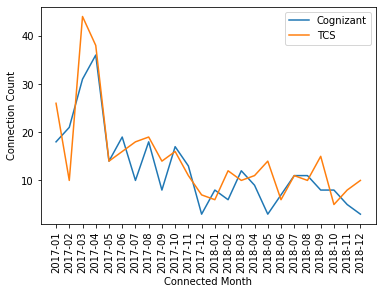

In [136]:
from matplotlib import pyplot as plt

x1 = connections_cognizant_by_month.index.to_list()
x2 = connections_tcs_by_month.index.to_list()
y1 = connections_cognizant_by_month.values.tolist()
y2 = connections_tcs_by_month.values.tolist()

plt.plot(x1, y1, label='Cognizant')
plt.plot(x2, y2, label='TCS')
plt.xlabel('Connected Month')
plt.ylabel('Connection Count')

plt.xticks(rotation=90)

plt.legend()
plt.show()

## Plot using loops
Let us understand how to plot using loops.
* We will get top 5 organizations by connection count.
* We will get count by month for the years of 2017 and 2018 for top 5 organizations.
* Once we get counts by month for top 5 organizations, we should be able to plot for all organizations using loop.

* Get top 5 organization by connection count

In [63]:
organizations_top5 = connection_count_by_company[connection_count_by_company.index != 'nan']. \
    sort_values(ascending=False). \
    head(5)
organizations_top5

Company
Tata Consultancy Services    351
Cognizant                    299
Infosys                      184
Accenture                    166
Capgemini                    149
Name: Company, dtype: int64

* Get the connections for top 5 organizations

In [137]:
connections_top5 = connections[
    connections['Company'].isin(organizations_top5.index.tolist())
]
connections_top5

,First Name,Last Name,Email Address,Company,Position,Connected On,Connected Month
2455,724164ee0f66c5a7,e325237ee908249e,nan,Accenture,Technical Team Lead,30 Dec 2018,2018-12
2486,928e1273ab7b5bd7,1eb3d2c06687558d,nan,Tata Consultancy Services,Big Data Developer,28 Dec 2018,2018-12
2505,e065b88d88554890,afa3fd5761b3249d,nan,Tata Consultancy Services,Big Data Developer,26 Dec 2018,2018-12
2526,984371949198f4be,4df31cae772b6207,nan,Accenture,Associate Manager,25 Dec 2018,2018-12
2528,1105430bf40f2e0d,b8716546fcad37d7,nan,Tata Consultancy Services,Assistant System Engineer,25 Dec 2018,2018-12
...,...,...,...,...,...,...,...
18681,0721636b3dad2f48,d12a54842ad66bc6,nan,Capgemini,Consultant,05 Jan 2017,2017-01
18684,1105430bf40f2e0d,1ac2e86acd81b55a,nan,Cognizant,Senior Associate,05 Jan 2017,2017-01
18690,b8d796caf86a8135,3df229f0da8d180a,nan,Cognizant,Big Data Architect,04 Jan 2017,2017-01
18701,518db5be6f078649,a75007d4189511d5,nan,Cognizant,Senior Associate,03 Jan 2017,2017-01


* Get count by month for each of the top 5 organizations (for the years of 2017 as well as 2018).
* It will result in multiindex (Company and Connected Month).

In [138]:
connections_top5_count_by_month = connections_top5. \
    groupby(["Company", "Connected Month"])["Connected Month"]. \
    count()
connections_top5_count_by_month

Company                    Connected Month
Accenture                  2017-01            14
                           2017-02             9
                           2017-03            19
                           2017-04            18
                           2017-05            10
                                              ..
Tata Consultancy Services  2018-08            10
                           2018-09            15
                           2018-10             5
                           2018-11             8
                           2018-12            10
Name: Connected Month, Length: 119, dtype: int64

* We can use `index.get_level_values` to get values from multiindex columns.
* Here is the example to filter for **Accenture** using first column in multiindex.

In [139]:
connections_top5_count_by_month[
    connections_top5_count_by_month.index.get_level_values(0) == 'Accenture'
]

Company    Connected Month
Accenture  2017-01            14
           2017-02             9
           2017-03            19
           2017-04            18
           2017-05            10
           2017-06             8
           2017-07             9
           2017-08             7
           2017-09             6
           2017-10             9
           2017-11             7
           2017-12             2
           2018-01             7
           2018-02             3
           2018-03             5
           2018-04             4
           2018-05             2
           2018-06             2
           2018-07             2
           2018-08             8
           2018-09             1
           2018-10             4
           2018-11             1
           2018-12             9
Name: Connected Month, dtype: int64

* We can use `organizations_top5` to get the organization names so that we can plot for each of the five organizations.

In [140]:
for org in organizations_top5.index.to_list():
    print(org)

Tata Consultancy Services
Cognizant
Infosys
Accenture
Capgemini


* Example for plotting using loops.

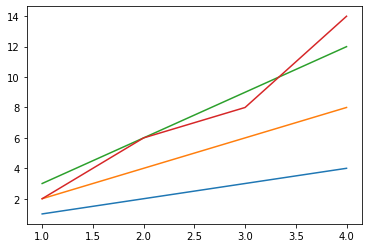

In [148]:
import matplotlib.pyplot as plt
x=[[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]
y=[[1,2,3,4],[2,4,6,8],[3,6,9,12],[2,6,8,14]]
plt.figure()
for i in range(len(x)):
    plt.plot(x[i],y[i])
    # Show/save figure as desired.
plt.show()

* Plotting for top 5 organizations using monthly counts for 2017 and 2018.

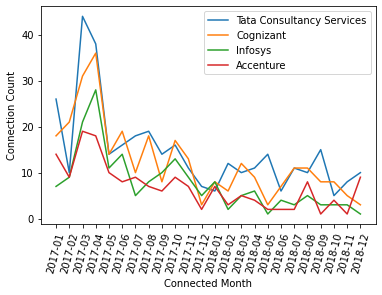

In [149]:
from matplotlib import pyplot as plt

for org in organizations_top5.index.to_list()[:4]:
    data = connections_top5_count_by_month[
        connections_top5_count_by_month.index.get_level_values(0) == org
    ]
    x = data.index.get_level_values(1).to_list()
    y = data.values.tolist()
    plt.plot(x, y, label=org)

plt.xlabel("Connected Month")
plt.ylabel("Connection Count")

plt.legend()
plt.xticks(rotation=75)
plt.show()

## Bar Graphs

Let us understand how to plot bar graph. It is primarily to visu

In [145]:
# Get top 5 organizations for year 2017
import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)
connections = connections. \
    query('`Connected On`.str.contains("2017")')
connections

,First Name,Last Name,Email Address,Company,Position,Connected On
6458,7c85cf13469df4ad,a533408e3057fbab,nan,VIJETHA SUPERMARKETS PVT LTD,Supervisor,31 Dec 2017
6459,9e57096ee48fd25c,3538f9118a2d7a9a,nan,HCL America INC,Senior ETL/Big Data Developer,31 Dec 2017
6460,5de74ef4130d6930,098492fb15d93a70,nan,"Softpath System, LLC",Technical Recruiter,31 Dec 2017
6461,e292ad4676b5db28,e1f9f4eb67a19e27,nan,Citibank India,Manager,31 Dec 2017
6462,96b032d9797f2784,6378970d46288fbd,nan,Accenture,Manager,31 Dec 2017
...,...,...,...,...,...,...
18723,aa5af8e173cfcf24,1a315620878e5af6,nan,Atos Syntel,Consultant,01 Jan 2017
18724,cb590ecf8a932956,febf7a7e2f605907,nan,Ernst & Young,Big Data-Data Science Evangelist/Sr.Analytics ...,01 Jan 2017
18725,f798f3280ccb2d6e,56053813ae694d4d,nan,nan,nan,01 Jan 2017
18726,aa7133e6205fb23f,8121a6fe0f0a8d9e,nan,Hewlett Packard Enterprise,Associate Hadoop Developer,01 Jan 2017


In [146]:
connections_count = connections.groupby('Company')['Company'].count()
top_organizations = connections_count[(connections_count.ge(100) == True) & (connections_count.index != 'nan')]

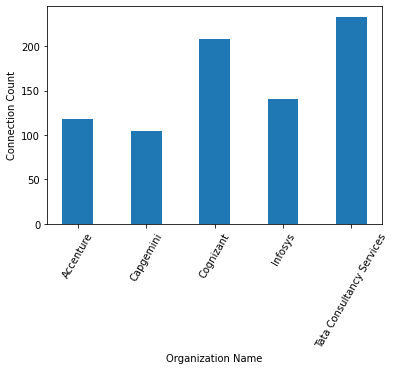

In [147]:
from matplotlib import pyplot as plt
organizations = top_organizations.index.to_list()
cnt = top_organizations.values.tolist()
plt.bar(organizations, cnt, width=0.45)

plt.xlabel("Organization Name")
plt.ylabel("Connection Count")

plt.xticks(rotation=60)
plt.show()

In [ ]:
import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)
connections = connections. \
    query('Company != "nan"')
connections

In [ ]:
connections.count()

In [ ]:
import numpy as np
connections.replace('nan', np.NaN). \
    count()

In [ ]:
connections_count_by_org = connections. \
    groupby('Company')['Company']. \
    count()

In [ ]:
connections_count_by_org = connections_count_by_org[connections_count_by_org.ge(100) == True]
connections_count_by_org

In [ ]:
from matplotlib import pyplot as plt

connection_counts = connections_count_by_org.values.tolist()

plt.hist(connection_counts, 
         bins=list(range(100, 601, 100)),
         rwidth=0.8,
         label='Top Organizations'
        );

plt.xlabel('Connection Count')
plt.ylabel('Organization Count')

plt.legend()
plt.show()

In [ ]:
import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)
connections = connections. \
    query('Company != "nan"')
connections

In [ ]:
connections_count_by_org = connections. \
    groupby('Company')['Company']. \
    count()

In [ ]:
connections_count_by_org = connections_count_by_org[
    (connections_count_by_org.ge(10) == True) & 
    (connections_count_by_org.le(50) == True)
]
connections_count_by_org

In [ ]:
from matplotlib import pyplot as plt

connection_counts = connections_count_by_org.values.tolist()

plt.hist(connection_counts, 
         bins=range(10, 51, 10),
         rwidth=0.8,
         label='Moderate Organizations'
        )

plt.xlabel('Connection Count')
plt.ylabel('Organization Count')

plt.legend()
plt.show()

In [ ]:
plt.stackplot?